<img src="scheme.png" width="393"/>
<img src="connectome.png">


* MC_in - Motor cortex, input
* MC_out - Motor cortex, output
* DS - Dorsal Striatum; Go and NoGo neurons
* SNc – Substantia nigra pars compacta
* GPe – Globus pallidus externa
* STN – Subthalamic nucleus
* GPi – Globus pallidus pars interna
* Th – Thalamus
* Pons
* CC – Cerebellar cortex (anterior lobe)
* DN – Dentate nucleus


In [10]:
from brian2 import *
%matplotlib inline

#basic neuronal group characteristics
tau = 10*ms
neurons_num = 12 #referring to the number of stuctures and subgroups sizes

v_th = -50*mV #threshold potential
v_r = -70*mV  # reset potential


eqs = '''
dv/dt = -v/tau : volt
'''

Prototype = NeuronGroup(neurons_num, eqs, threshold='v > v_th', reset='v = v_r')

# Mapping subgroups by cerebellum integration circuit
MC_in = Prototype[0]
DSGo = Prototype[1]
DSNoGo = Prototype[2]
GPi = Prototype[3]
GPe = Prototype[5]
STN = Prototype[6]
Th = Prototype[4]
MC_out = Prototype[11]

Pons = Prototype[7]
CC = Prototype[8]
DN = Prototype[9]

SNc = Prototype[10]

#Setting up synapses
#excitatory synapses
S_exc = Synapses(Prototype, Prototype, on_pre='v_post += 0.15')
S_exc.connect(i=MC_in, j=[2, 3])
S_exc.connect(i=Th, j=MC_out)
S_exc.connect(i=SNc, j=DSGo)

#cerebellum route
S_exc.connect(i=MC_in, j=Pons)
S_exc.connect(i=Pons, j=CC)
S_exc.connect(i=DN, j=Th)

#inhibitory synapses
S_inh = Synapses(Prototype, Prototype, on_pre='v_post -= 0.15')
S_inh.connect(i=DSGo, j=GPi)
S_inh.connect(i=DSNoGo, j=GPe)
S_inh.connect(i=GPe, j=GPi)
S_inh.connect(i=GPi, j=Th)
S_inh.connect(i=SNc, j=DSNoGo)

#cerebellum route
S_inh.connect(i=CC, j=DN)



In [20]:
Prototype

NeuronGroup(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='neurons')

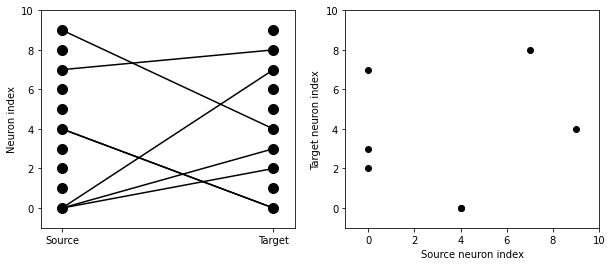

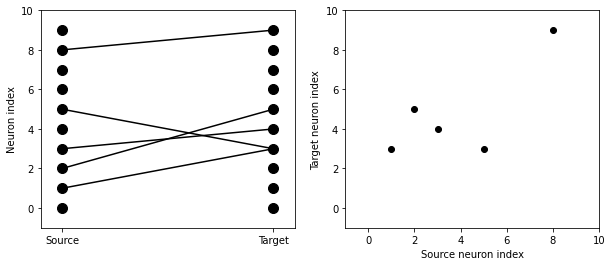

In [3]:
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

visualise_connectivity(S_exc)
visualise_connectivity(S_inh)

In [ ]:
M = StateMonitor(Prototype, 'v', record=True)

run(50*ms)

plot(M.t/ms, M.v[0], label='MC')
plot(M.t/ms, M.v[1], label='PutGo')
plot(M.t/ms, M.v[2], label='PutNoGo')
plot(M.t/ms, M.v[4], label='Th')
plot(M.t/ms, M.v[8], label='CC')
plot(M.t/ms, M.v[9], label='DN')
plot(M.t/ms, M.v[3], label='GPi')
xlabel('Time (ms)')
ylabel('v')
legend();